In [9]:
import os, pandas as pd, numpy as np

In [4]:
os.chdir(""E:\\SCMA_632\\data"")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (78014404.py, line 1)

In [10]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1",low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'NSSO68.csv'

In [11]:

df.head()


NameError: name 'df' is not defined

In [13]:
os.chdir(""E:\\SCMA_632\\Data"")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2858782508.py, line 1)

In [14]:
os.chdir("E:\\SCMA_632\\Data")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\SCMA_632\\Data'

In [16]:
os.chdir("E:\\SCMA 632\\Data")


In [17]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [18]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [19]:
TN = df[df['state_1']=="TN"]

In [20]:
TN.isnull().sum().sort_values(ascending = False)

soyabean_q             6647
soyabean_v             6647
Meals_School           6624
Land_Leased_out        6522
Otherwise_possessed    6505
                       ... 
brinjal_q                 0
tamato_q                  0
onion_q                   0
potato_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [21]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [22]:
TN_new = TN[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [23]:
TN_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       145
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [24]:
TN_clean = TN_new.copy()

In [25]:
TN_clean.loc[:, 'Meals_At_Home'] = TN_clean['Meals_At_Home'].fillna(TN_new['Meals_At_Home'].mean())


In [26]:
TN_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

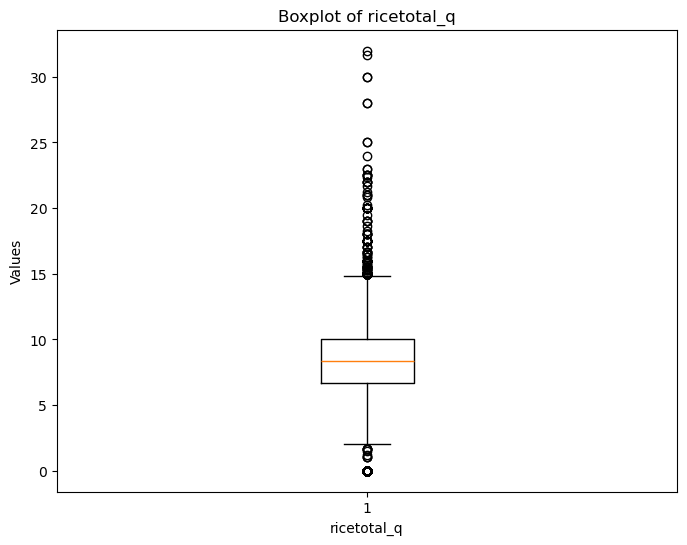

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(TN_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [29]:
rice1 = TN_clean['ricetotal_q'].quantile(0.25)
rice2 = TN_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [30]:
TN_clean=TN_new[(TN_new['ricetotal_q']<=up_limit)&(TN_new['ricetotal_q']>=low_limit)]


{'whiskers': [<matplotlib.lines.Line2D at 0x2641233de50>,
 'caps': [<matplotlib.lines.Line2D at 0x2641233f710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2641233d250>],
 'medians': [<matplotlib.lines.Line2D at 0x26412350e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x26412351990>],
 'means': []}

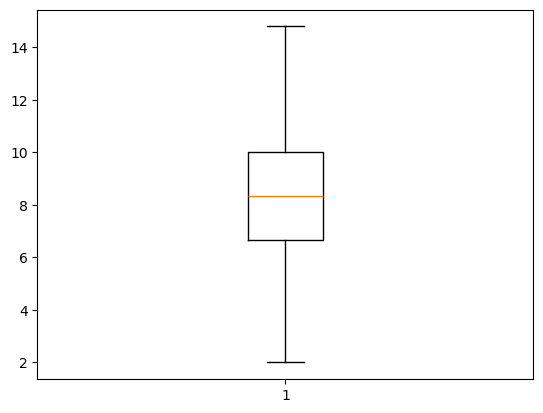

In [31]:

plt.boxplot(TN_clean['ricetotal_q'])


In [32]:
TN_clean['District'].unique()

array([29, 28, 27, 26, 30, 24, 25, 23, 21, 19, 13, 20,  2,  7,  4,  6, 18,
        8, 31,  5, 22, 17, 16, 11, 10,  9, 12,  3,  1, 15, 14],
      dtype=int64)

In [33]:
TN_clean.loc[:,'Sector'] = TN_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])


In [34]:
TN_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [35]:
TN_clean.loc[:, 'total_consumption'] = TN_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\prami\AppData\Local\Temp\ipykernel_1928\1287613432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TN_clean.loc[:, 'total_consumption'] = TN_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [36]:
TN_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
20869,TN,29,RURAL,3,333,7.5,1.0,0.000,0,0.5,0.125,25.150588,15.0060,90.0,49.281588
20870,TN,29,RURAL,3,333,5.0,0.5,0.125,0,0.0,0.000,28.400400,30.0000,80.0,64.025400
20871,TN,29,RURAL,3,333,7.0,0.5,0.250,0,0.5,0.000,24.595815,0.0000,90.0,32.845815
20872,TN,29,RURAL,3,333,7.5,0.5,0.000,0,0.0,0.000,22.189005,25.0000,90.0,55.189005
20873,TN,29,RURAL,3,333,7.0,0.4,0.050,0,0.2,0.000,19.280350,10.0024,90.0,36.932750


In [37]:
TN_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              28.241680  49.547502  274.841122  12.041775
2              29.518609  60.247294  321.475864  10.300050
3              24.523313  48.639260  255.452525  12.900305
4              27.764530  51.623701  310.071325   8.676114

In [38]:
TN_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                31.107705  51.250005  274.841122  17.760687
2                35.521414  60.717099  247.280805  15.900885
3                31.367150  54.544274  232.399612  16.547300
4                22.311726  46.161243  183.217253  17.847675
5                19.643158  44.435642  151.504035  19.212734
6                17.588779  40.979065  128.914192  15.108771
7                20.609721  40.369542  123.763081  12.041775
8                24.616054  47.070912  166.200390  17.200350
9                21.879125  52.117416  128.625417  23.375305
10               24.692651  48.147252  181.800695   8.676114
11               17.526708  40.565681  131.527330  19.775200
12               35.619700  62.102486  310.071325  15.308508
13               25.807503  53.390786  163.971125  22.617814
14               32.838083  62.253786  238.001433  15.702350
15               30.157753  63.583406  185.939715  18.686129
16               25.605384  57.368455  152.757682  25.396552
17               43.278702  54.834462  321.475864  22.250535
18               25.459005  48.088103  226.251550  13.814226
19               21.564580  56.614175  180.563100  24.920750
20               23.345717  59.339448  137.447500  15.050455
21               29.895657  60.639306  214.226413  10.300050
22               30.894173  61.949632  186.202468  19.790186
23               20.964437  46.646420  193.050578  15.685200
24               21.494698  53.461849  189.728463  18.285000
25               17.675070  48.978490  117.290175  22.970679
26               26.360528  50.580095  255.452525  12.900305
27               20.341981  47.490903  147.050465  17.750478
28               23.512213  39.184821  173.825496  15.111179
29               28.961136  47.286311  229.084062  14.499710
30               25.941169  48.602154  244.576685  19.933094
31               22.760375  52.553203  147.053625  19.683693

In [39]:
total_consumption_by_districtcode=TN_clean.groupby('District')['total_consumption'].sum()

In [40]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)


District
12    25710.429013
2     18457.998103
3     15654.206581
Name: total_consumption, dtype: float64

In [41]:
TN_clean.loc[:,"District"] = TN_clean.loc[:,"District"].replace({12: "Dharmapuri", 2: "Chennai", 23: "Kancheepuram"})

In [43]:
total_consumption_by_districtname=TN_clean.groupby('District')['total_consumption'].sum()

In [44]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Dharmapuri    25710.429013
Chennai       18457.998103
3             15654.206581
Name: total_consumption, dtype: float64

In [45]:
from statsmodels.stats import weightstats as stests

In [46]:
rural=TN_clean[TN_clean['Sector']=="RURAL"]
urban=TN_clean[TN_clean['Sector']=="URBAN"]

In [47]:

rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
20869,TN,29,RURAL,3,333,7.5,1.0,0.000,0,0.5,0.125,25.150588,15.0060,90.0,49.281588
20870,TN,29,RURAL,3,333,5.0,0.5,0.125,0,0.0,0.000,28.400400,30.0000,80.0,64.025400
20871,TN,29,RURAL,3,333,7.0,0.5,0.250,0,0.5,0.000,24.595815,0.0000,90.0,32.845815
20872,TN,29,RURAL,3,333,7.5,0.5,0.000,0,0.0,0.000,22.189005,25.0000,90.0,55.189005
20873,TN,29,RURAL,3,333,7.0,0.4,0.050,0,0.2,0.000,19.280350,10.0024,90.0,36.932750


In [48]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
41967,TN,20,URBAN,2,332,8.333333,1.666667,0.333333,0,0.000000,0.0,29.983937,20.000000,90.0,60.317270
41968,TN,20,URBAN,2,332,8.500000,1.000000,0.075000,0,0.000000,0.0,24.975812,20.000000,90.0,54.550812
41969,TN,20,URBAN,2,332,7.500000,0.500000,0.100000,0,0.000000,0.0,21.725610,20.000000,90.0,49.825610
41970,TN,20,URBAN,2,332,8.000000,0.666667,0.050000,0,0.333333,0.0,23.290558,13.333333,90.0,45.673892
41972,TN,20,URBAN,2,332,10.000000,0.250000,0.075000,0,0.250000,0.0,27.425912,20.000000,88.0,58.000912


In [49]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']


In [50]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 8.117023525747657
P-Value: 4.777561838635712e-16
